In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('star_classification.csv')

In [4]:
print(df.isnull().sum())


obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [6]:
# 先获取所有的数值列
numerical_columns = df.select_dtypes(include=[np.number]).columns

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()


obj_ID            0
alpha             0
delta             0
u                56
g                99
r               132
i               198
z               320
run_ID            0
rerun_ID          0
cam_col           0
field_ID       5391
spec_obj_ID       0
redshift       8990
plate             0
MJD               0
fiber_ID          0
dtype: int64

In [22]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [23]:
data = df[['u', 'g', 'r', 'i', 'z', 'redshift']]


In [25]:
tsne = TSNE(n_components=2, random_state=0)
data_2d = tsne.fit_transform(data)


In [26]:
kmeans = KMeans(n_clusters=3, random_state=0)  # 假设我们希望将对象分为3类
labels = kmeans.fit_predict(data_2d)


c:\Users\10762\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


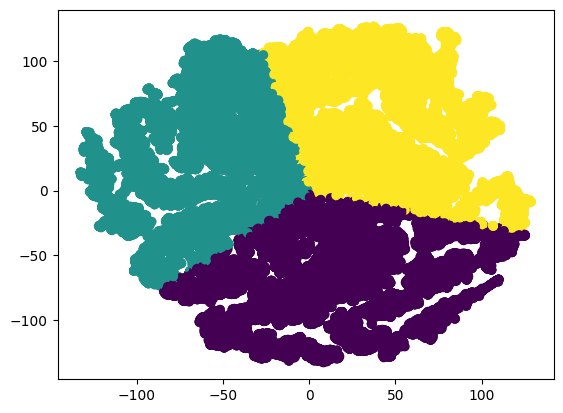

In [27]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels)
plt.show()


In [28]:
df['class'] = df['class'].astype('category')
class_labels = df['class'].cat.codes


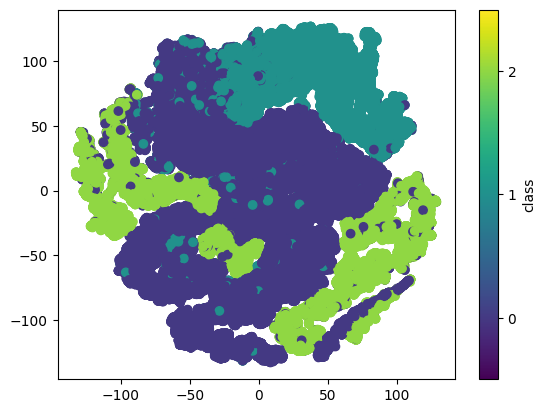

In [29]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=class_labels)
plt.colorbar(ticks=range(len(df['class'].cat.categories)), label='class')
plt.clim(-0.5, len(df['class'].cat.categories)-0.5)
plt.show()


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder


In [7]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])


In [8]:
X = df.drop('class', axis=1)
y = df['class']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=0)

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    voting='soft')  # soft voting


c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [11]:
voting_clf.fit(X_train, y_train)


c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=0, ...))],
                 voting='soft')

In [12]:
print("Test set accuracy: {:.5f}".format(voting_clf.score(X_test, y_test)))


Test set accuracy: 0.97933


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder


In [5]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])


In [8]:
X = df.drop('class', axis=1)
y = df['class']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
svm = SVC(probability=True, random_state=0)  # probability=True so that predict_proba can be used

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('svm', svm)],
    voting='soft')  # soft voting


In [25]:
voting_clf.fit(X_train, y_train)


In [9]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 定义模型
rf = RandomForestClassifier(n_estimators=100, random_state=0)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
gbdt = GradientBoostingClassifier(random_state=0)

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('gbdt', gbdt)],
    voting='soft')  # soft voting

# 训练模型
voting_clf.fit(X_train, y_train)

# 测试模型
print("Test set accuracy: {:.2f}".format(voting_clf.score(X_test, y_test)))


c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Test set accuracy: 0.98


In [10]:

# 测试模型
print("Test set accuracy: {:.5f}".format(voting_clf.score(X_test, y_test)))


Test set accuracy: 0.97890


In [11]:
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')


c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [12]:
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.5f}".format(accuracy))


Test set accuracy: 0.97923


In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [18]:
y_pred = rf.predict(X_test)
print("Test set accuracy: {:.5f}".format(accuracy_score(y_test, y_pred)))


Test set accuracy: 0.97840


In [19]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [31]:
stacking = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=LogisticRegression()
)


In [32]:
X = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID']]
y = df['class']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [34]:
stacking.fit(X_train, y_train)


c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\1

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importa...ne,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [35]:
print('Train score:', stacking.score(X_train, y_train))
print('Test score:', stacking.score(X_test, y_test))


Train score: 1.0
Test score: 0.978675


In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 定义模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
gbdt = GradientBoostingClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('gbdt', gbdt)],
    voting='soft')  # soft voting

# 训练模型
voting_clf.fit(X_train, y_train)

# 测试模型
print("Test set accuracy: {:.5f}".format(voting_clf.score(X_test, y_test)))


c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Test set accuracy: 0.97877


In [37]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Test set accuracy: {:.5f}".format(accuracy_score(y_test, y_pred)))


Test set accuracy: 0.97857


In [40]:
from sklearn.model_selection import cross_val_score


In [43]:
scores = cross_val_score(stacking, X, y, cv=5)

print('Cross-validation scores: {}'.format(scores))


c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\10762\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\1

Cross-validation scores: [0.97945 0.97975 0.97935 0.98095 0.9783 ]


In [46]:
print('Average cross-validation score: {:.5f}'.format(scores.mean()))
print('Standard Deviation of cross-validation score: {:.5f}'.format(scores.std()))


Average cross-validation score: 0.97956
Standard Deviation of cross-validation score: 0.00085
